<a href="https://colab.research.google.com/github/kTanu/StockPriceAnalysis/blob/main/StockPriceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the Libraries
import pandas as pd
import numpy as np
import sklearn
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow import keras
from keras.layers import Conv2D, Input, MaxPool2D,Flatten, Dense, Permute, GlobalAveragePooling2D
from keras.models import Model
from keras.models import load_model
from keras.layers import LSTM
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
stock_data = pd.read_csv("/content/drive/My Drive/dataset/MSFT.csv")


In [ ]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9083 non-null   object 
 1   Open       9083 non-null   float64
 2   High       9083 non-null   float64
 3   Low        9083 non-null   float64
 4   Close      9083 non-null   float64
 5   Adj Close  9083 non-null   float64
 6   Volume     9083 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 496.9+ KB


In [ ]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", stock_data.shape)
print("Null Value Present: ", stock_data.isnull().values.any())


Dataframe Shape:  (9083, 7)
Null Value Present:  False


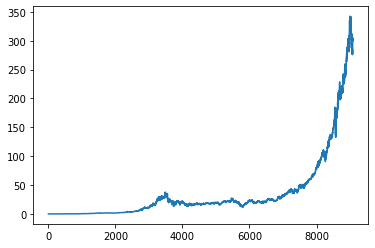

In [ ]:
#Plot the True Adj Close Value
stock_data['Adj Close'].plot()

In [ ]:
#Set Target Variable
output_var = pd.DataFrame(stock_data['Adj Close'])
#Selecting the Features
features = ['Open','High','Low','Volume']

In [ ]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(stock_data[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=stock_data.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.000000,0.000027,0.000000,1.000000
1,0.000025,0.000030,0.000025,0.297096
2,0.000035,0.000032,0.000036,0.127119
3,0.000040,0.000032,0.000030,0.063588
4,0.000033,0.000025,0.000025,0.044285


In [ ]:
#Splitting to Training set and Test set
from sklearn.model_selection import TimeSeriesSplit
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

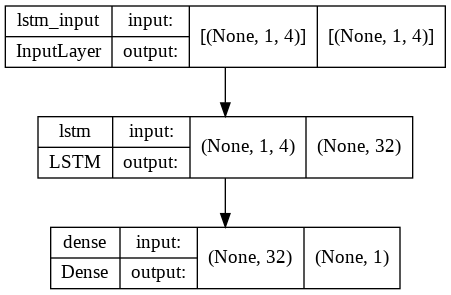

In [ ]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
#Model Training

history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
1033/1033 [==============================] - 4s 2ms/step - loss: 101.5057
Epoch 2/100
1033/1033 [==============================] - 3s 3ms/step - loss: 213.6254
Epoch 3/100
1033/1033 [==============================] - 3s 3ms/step - loss: 156.4832
Epoch 4/100
1033/1033 [==============================] - 3s 3ms/step - loss: 89.1116
Epoch 5/100
1033/1033 [==============================] - 3s 3ms/step - loss: 44.8870
Epoch 6/100
1033/1033 [==============================] - 3s 3ms/step - loss: 18.4709
Epoch 7/100
1033/1033 [==============================] - 3s 3ms/step - loss: 6.9575
Epoch 8/100
1033/1033 [==============================] - 3s 2ms/step - loss: 3.4724
Epoch 9/100
1033/1033 [==============================] - 2s 2ms/step - loss: 2.3885
Epoch 10/100
1033/1033 [==============================] - 2s 2ms/step - loss: 1.8533
Epoch 11/100
1033/1033 [==============================] - 3s 3ms/step - loss: 1.5231
Epoch 12/100
1033/1033 [==============================] - 3s 2ms/

In [ ]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

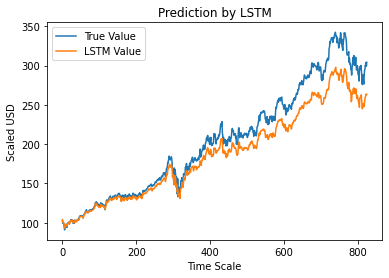

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [ ]:
lstm.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# converting categorical variables in y_train to numerical variables
y_train_dummies = pd.get_dummies(y_train).values
print('Shape of Label tensor: ', y_train_dummies.shape)

Shape of Label tensor:  (8258, 6166)


In [ ]:
lstm.save('Msft.h100')

INFO:tensorflow:Assets written to: Msft.h100/assets


In [ ]:
# converting categorical variables in y_train to numerical variables
y_test_dummies = pd.get_dummies(y_test).values
print('Shape of Label tensor: ', y_test_dummies.shape)

Shape of Label tensor:  (825, 814)


In [ ]:

# accuracy
def accuracy_metric(actual,predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
 
# Test accuracy
accuracy = accuracy_metric(actual,predicted)
print(accuracy)

NameError: ignored